In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
panel_df = pd.read_stata('did_panel_occind_Q.dta')

In [16]:
def plot_sum_occ_log_agg(panel_df, occ_codes, title="log(sum of postings + 1) across selected occupations"):
    """
    Sum postings across the provided occupation codes (across industries) by quarter,
    then plot log( sum(num_postings) + 1 ). Draws a vertical line at 2023Q1.
    """
    if not isinstance(occ_codes, (list, tuple)) or len(occ_codes) == 0:
        raise ValueError("Provide a non-empty list of occupation codes.")

    # full quarter index so we keep gaps as 0
    all_q = panel_df['time'].drop_duplicates().sort_values().tolist()
    xlabels = [f"{d.year}Q{((d.month-1)//3)+1}" for d in all_q]

    # filter to selected occ codes and aggregate across industries
    df_sel = panel_df[panel_df['occ'].astype(str).isin([str(c) for c in occ_codes])].copy()
    summed = (df_sel.groupby('time', as_index=True)['num_postings']
                    .sum()
                    .reindex(all_q)
                    .fillna(0.0))

    log_sum = np.log(summed + 1.0)

    # plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(all_q, log_sum.values, marker='o', linewidth=1.8, label='Selected occupations')

    # treatment line at 2023Q1
    event_dt = pd.Period('2023Q1', freq='Q').start_time
    ax.axvline(event_dt, linestyle='--', linewidth=1.2, color='red')

    ax.set_xticks(all_q)
    ax.set_xticklabels(xlabels, rotation=0)
    ax.set_title(title)
    ax.set_xlabel("Quarter (0 = 2023Q1)")
    ax.set_ylabel("log(sum of postings + 1)")
    # small padding so it doesn't look cramped
    ymin, ymax = float(log_sum.min()), float(log_sum.max())
    ax.set_ylim(ymin - 0.2, ymax + 0.2)
    ax.grid(True, axis='y', linestyle=':', alpha=0.5)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()

    return log_sum

In [10]:
tech_occ_codes = [
    "15-1211.00","15-1211.01","15-1212.00","15-1221.00","15-1231.00","15-1232.00",
    "15-1241.00","15-1241.01","15-1242.00","15-1243.00","15-1243.01","15-1244.00",
    "15-1251.00","15-1252.00","15-1253.00","15-1254.00","15-1255.00","15-1255.01",
    "15-1299.01","15-1299.02","15-1299.03","15-1299.04","15-1299.05","15-1299.06",
    "15-1299.07","15-1299.08","15-1299.09","15-2011.00","15-2021.00","15-2031.00",
    "15-2041.00","15-2041.01","15-2051.00","15-2051.01","15-2051.02","15-2099.01"
]


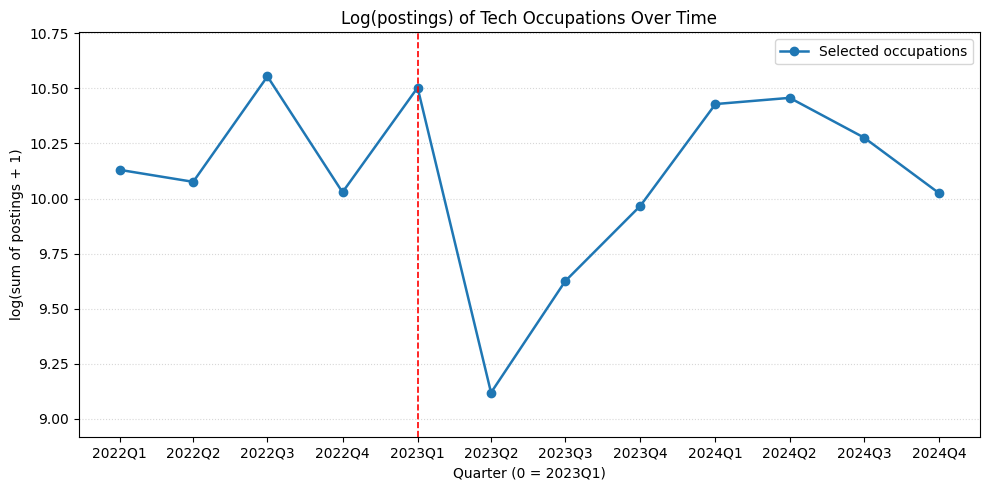

time
2022-01-01    10.130145
2022-04-01    10.075843
2022-07-01    10.554197
2022-10-01    10.028710
2023-01-01    10.503258
2023-04-01     9.119321
2023-07-01     9.625624
2023-10-01     9.967072
2024-01-01    10.428748
2024-04-01    10.456913
2024-07-01    10.276808
2024-10-01    10.024465
Name: num_postings, dtype: float64

In [ ]:
plot_sum_occ_log_agg(panel_df, tech_occ_codes, title="Log(postings) of Tech Occupations Over Time")

Low AI Exposure Occupations

In [3]:
df_2020 = pd.read_csv("merged_2020_df.csv")
df_2021 = pd.read_csv("merged_2021_df.csv")
df_2022 = pd.read_csv("merged_2022_df.csv")
df_2023 = pd.read_csv("merged_2023_df.csv")
df_2024 = pd.read_csv("merged_2024_df.csv")

In [4]:
df_full = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024])

In [5]:
df_pre = df_full[df_full['post_date'] <= '2022-11-30']

In [6]:
pre_treatment_occ_list = df_pre['onet_code'].unique()

In [7]:
scores_df = pd.read_csv('data/AI Exposure Scores/occ_level_eloundou.csv')

In [8]:
scores_df['avg_exposure'] = (scores_df['dv_rating_beta'] + scores_df['human_rating_beta']) / 2

In [9]:
scores_df.head()

,O*NET-SOC Code,Title,dv_rating_alpha,dv_rating_beta,dv_rating_gamma,human_rating_alpha,human_rating_beta,human_rating_gamma,avg_exposure
0,11-1011.00,Chief Executives,0.100000,0.460000,0.820000,0.180000,0.350000,0.520000,0.405000
1,11-1011.03,Chief Sustainability Officers,0.166667,0.555556,0.944444,0.055556,0.388889,0.722222,0.472222
2,11-1021.00,General and Operations Managers,0.000000,0.480769,0.961538,0.115385,0.384615,0.653846,0.432692
3,11-1031.00,Legislators,0.033333,0.400000,0.766667,0.266667,0.516667,0.766667,0.458333
4,11-2011.00,Advertising and Promotions Managers,0.000000,0.476744,0.953488,0.255814,0.546512,0.837209,0.511628


In [10]:
pre_treatment_df = scores_df[scores_df['O*NET-SOC Code'].isin(pre_treatment_occ_list)].copy()

In [11]:
pre_treatment_df['avg_exposure'] = (pre_treatment_df['dv_rating_beta'] + pre_treatment_df['human_rating_beta']) / 2

In [12]:
median_exposure_score = pre_treatment_df['avg_exposure'].median()

In [13]:
low_exposure_occupations = scores_df[scores_df['avg_exposure'] <= median_exposure_score]
high_exposure_occupations = scores_df[scores_df['avg_exposure'] > median_exposure_score]

In [ ]:
low_exposure_occupations

,O*NET-SOC Code,Title,dv_rating_alpha,dv_rating_beta,dv_rating_gamma,human_rating_alpha,human_rating_beta,human_rating_gamma,avg_exposure
0,11-1011.00,Chief Executives,0.100000,0.460000,0.820000,0.180000,0.350000,0.520000,0.405000
2,11-1021.00,General and Operations Managers,0.000000,0.480769,0.961538,0.115385,0.384615,0.653846,0.432692
10,11-3013.00,Facilities Managers,0.000000,0.318182,0.636364,0.090909,0.272727,0.454545,0.295455
16,11-3051.00,Industrial Production Managers,0.060606,0.484848,0.909091,0.151515,0.348485,0.545455,0.416667
18,11-3051.02,Geothermal Production Managers,0.200000,0.483333,0.766667,0.133333,0.383333,0.633333,0.433333
...,...,...,...,...,...,...,...,...,...
918,53-7071.00,Gas Compressor and Gas Pumping Station Operators,0.230769,0.269231,0.307692,0.000000,0.076923,0.153846,0.173077
919,53-7072.00,"Pump Operators, Except Wellhead Pumpers",0.166667,0.250000,0.333333,0.000000,0.166667,0.333333,0.208333
920,53-7073.00,Wellhead Pumpers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
921,53-7081.00,Refuse and Recyclable Material Collectors,0.178571,0.196429,0.214286,0.107143,0.232143,0.357143,0.214286


In [21]:
len(low_exposure_occupations[low_exposure_occupations['human_rating_beta'] < 0.2]) / len(low_exposure_occupations)

0.5632183908045977

In [23]:
len(low_exposure_occupations[low_exposure_occupations['human_rating_beta'] == 0])

58

In [15]:
high_exposure_occupations

,O*NET-SOC Code,Title,dv_rating_alpha,dv_rating_beta,dv_rating_gamma,human_rating_alpha,human_rating_beta,human_rating_gamma,avg_exposure
1,11-1011.03,Chief Sustainability Officers,0.166667,0.555556,0.944444,0.055556,0.388889,0.722222,0.472222
3,11-1031.00,Legislators,0.033333,0.400000,0.766667,0.266667,0.516667,0.766667,0.458333
4,11-2011.00,Advertising and Promotions Managers,0.000000,0.476744,0.953488,0.255814,0.546512,0.837209,0.511628
5,11-2021.00,Marketing Managers,0.062500,0.500000,0.937500,0.218750,0.578125,0.937500,0.539062
6,11-2022.00,Sales Managers,0.000000,0.450000,0.900000,0.100000,0.483333,0.866667,0.466667
...,...,...,...,...,...,...,...,...,...
635,43-9041.00,Insurance Claims and Policy Processing Clerks,0.666667,0.833333,1.000000,0.261905,0.511905,0.761905,0.672619
637,43-9061.00,"Office Clerks, General",0.363636,0.575758,0.787879,0.212121,0.500000,0.787879,0.537879
639,43-9081.00,Proofreaders and Copy Markers,0.950000,0.975000,1.000000,0.200000,0.600000,1.000000,0.787500
640,43-9111.00,Statistical Assistants,0.826087,0.891304,0.956522,0.347826,0.673913,1.000000,0.782609


In [16]:
pd.set_option('display.max_rows', None) 

In [17]:
low_exposure_occupations[low_exposure_occupations['O*NET-SOC Code'].isin(panel_df['occ'])]

,O*NET-SOC Code,Title,dv_rating_alpha,dv_rating_beta,dv_rating_gamma,human_rating_alpha,human_rating_beta,human_rating_gamma,avg_exposure
0,11-1011.00,Chief Executives,0.100000,0.460000,0.820000,0.180000,0.350000,0.520000,0.405000
2,11-1021.00,General and Operations Managers,0.000000,0.480769,0.961538,0.115385,0.384615,0.653846,0.432692
10,11-3013.00,Facilities Managers,0.000000,0.318182,0.636364,0.090909,0.272727,0.454545,0.295455
16,11-3051.00,Industrial Production Managers,0.060606,0.484848,0.909091,0.151515,0.348485,0.545455,0.416667
18,11-3051.02,Geothermal Production Managers,0.200000,0.483333,0.766667,0.133333,0.383333,0.633333,0.433333
19,11-3051.03,Biofuels Production Managers,0.000000,0.285714,0.571429,0.071429,0.178571,0.285714,0.232143
21,11-3051.06,Hydroelectric Production Managers,0.057143,0.342857,0.628571,0.114286,0.314286,0.514286,0.328571
29,11-9021.00,Construction Managers,0.044444,0.444444,0.844444,0.200000,0.400000,0.600000,0.422222
31,11-9032.00,"Education Administrators, Kindergarten through...",0.018182,0.418182,0.818182,0.272727,0.454545,0.636364,0.436364
33,11-9041.00,Architectural and Engineering Managers,0.000000,0.471429,0.942857,0.114286,0.385714,0.657143,0.428571


In [18]:
high_exposure_occupations[high_exposure_occupations['O*NET-SOC Code'].isin(panel_df['occ'])]

,O*NET-SOC Code,Title,dv_rating_alpha,dv_rating_beta,dv_rating_gamma,human_rating_alpha,human_rating_beta,human_rating_gamma,avg_exposure
1,11-1011.03,Chief Sustainability Officers,0.166667,0.555556,0.944444,0.055556,0.388889,0.722222,0.472222
3,11-1031.00,Legislators,0.033333,0.400000,0.766667,0.266667,0.516667,0.766667,0.458333
4,11-2011.00,Advertising and Promotions Managers,0.000000,0.476744,0.953488,0.255814,0.546512,0.837209,0.511628
5,11-2021.00,Marketing Managers,0.062500,0.500000,0.937500,0.218750,0.578125,0.937500,0.539062
6,11-2022.00,Sales Managers,0.000000,0.450000,0.900000,0.100000,0.483333,0.866667,0.466667
7,11-2032.00,Public Relations Managers,0.150000,0.550000,0.950000,0.250000,0.575000,0.900000,0.562500
8,11-2033.00,Fundraising Managers,0.125000,0.562500,1.000000,0.250000,0.500000,0.750000,0.531250
9,11-3012.00,Administrative Services Managers,0.086957,0.391304,0.695652,0.260870,0.500000,0.739130,0.445652
11,11-3013.01,Security Managers,0.071429,0.482143,0.892857,0.250000,0.535714,0.821429,0.508929
12,11-3021.00,Computer and Information Systems Managers,0.121212,0.530303,0.939394,0.303030,0.560606,0.818182,0.545455
